## STATS 131 - Group Project
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Dataset sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   
### Objective:
To predict CPI (customer price index) of a country by using predictors that are relevant to the economic growth.

### Exploratory Data Analysis and Data Clean-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()  # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [3]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [4]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [5]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [6]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [7]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [8]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [9]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [10]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [11]:
employment = pd.read_csv("Labour_Force_and_Unemployment.csv", encoding ="ISO-8859-1")
employment = employment.loc[employment.Series == "Unemployment rate - Total"]
employment = employment.pivot(index = "Year", columns = "Country", values = "Value")

In [12]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [13]:
energy.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States Virgin Islands,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,19.0,99.0,4380.0,0.0,1198.0,0.0,NaN,2064.0,NaN,0.0,...,NaN,68588.0,51.0,NaN,0.0,5953.0,787.0,NaN,207.0,372.0
1995,16.0,43.0,4748.0,0.0,1585.0,0.0,NaN,2722.0,10.0,0.0,...,NaN,68963.0,45.0,2045.0,1.0,7962.0,1136.0,713.0,224.0,362.0
2000,18.0,34.0,6556.0,0.0,1803.0,0.0,NaN,3404.0,27.0,5.0,...,NaN,69339.0,46.0,2307.0,1.0,8965.0,1733.0,908.0,248.0,379.0
2005,23.0,48.0,7534.0,0.0,2934.0,0.0,NaN,3609.0,36.0,5.0,...,NaN,68124.0,45.0,2446.0,1.0,8283.0,2612.0,844.0,280.0,379.0
2010,41.0,69.0,6200.0,1.0,4085.0,0.0,0.0,3343.0,52.0,5.0,...,NaN,71893.0,89.0,2309.0,1.0,8139.0,2747.0,804.0,319.0,369.0


In [14]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [15]:
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurin. State of)' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Côte d\x92Ivoire' 'Croatia' 'Curaçao' 'Cyprus' 'Czechia'
 'Dem. Rep. of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Guin

In [16]:
name = 'United States of America'
table4 = pd.DataFrame(CPI.loc[:, name])
table4 = pd.concat([table4, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table4 = table4.swaplevel().unstack()
table4.fillna(method = "ffill", inplace = True)
table4.fillna(method = "bfill", inplace = True)

In [17]:
name = 'China'
table5 = pd.DataFrame(CPI.loc[:, name])
table5 = pd.concat([table5, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table5 = table5.swaplevel().unstack()
table5.fillna(method = "ffill", inplace = True)
table5.fillna(method = "bfill", inplace = True)

## Data Modeling:
### Response variable:
- CPI

### Predictor variables:
- Country ID (factor with 12 levels)
    - G7 countries: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
    - BRICS countires: Brazil, Russia, India, China and South Africa
- Year (factor with 7 levels)
    - 1995, 2005, 2010, 2014, 2015, 2016, 2017
- GDP
- Energy expenditure
- Technology expenditure
- Eductaion expenditure
- Exchange rates
- Internet usage rate
- Tourism expenditure
- Healthcare expenditure

In [18]:
rates["United States of America"] = 1
education["China"] = 0
# years = [1985, 1990, 1995, 2000, 2005, 2010, 2014, 2015, 2016, 2017]
years = CPI.index

In [19]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russia, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [20]:
df1

United States of America                                                  \
                          CPI      GDP   Energy Tech Education Rates Internet   
Year                                                                            
1995                     69.9  28758.0  68963.0  2.5      13.1   1.0     68.0   
2005                     89.6  44173.0  68124.0  2.5      13.1   1.0     68.0   
2010                    100.0  48574.0  71893.0  2.7      13.1   1.0     71.7   
2014                    108.6  48574.0  83426.0  2.7      13.5   1.0     73.0   
2015                    108.7  56948.0  84051.0  2.7      13.5   1.0     74.6   
2016                    110.1  58064.0  79672.0  2.7      13.5   1.0     75.2   
2017                    112.4  60055.0  79672.0  2.7      13.5   1.0     75.2   

                      Germany  ... United Kingdom  Italy                   \
       Tourism Health     CPI  ...         Health    CPI      GDP  Energy   
Year                           ...                                          
1995   93743.0   14.5    80.5  ...            7.2   71.6  20449.0  1235.0   
2005  122077.0   14.5    92.5  ...            7.2   91.0  31503.0  1269.0   
2010  167996.0   16.4   100.0  ...            8.5  100.0  35578.0  1384.0   
2014  167996.0   16.5   106.6  ...            9.8  107.4  35578.0  1539.0   
2015  249183.0   16.8   106.9  ...            9.9  107.5  30792.0  1509.0   
2016  246172.0   16.8   107.4  ...            9.9  107.4  31451.0  1408.0   
2017  251361.0   16.8   109.3  ...            9.9  108.7  32747.0  1408.0   

                                                    
     Tech Education Rates Internet  Tourism Health  
Year                                                
1995  1.0       9.0   0.8     35.0  30411.0    8.4  
2005  1.0       9.0   0.8     35.0  38373.0    8.4  
2010  1.2       8.7   0.8     53.7  38438.0    9.0  
2014  1.2       8.0   0.8     55.6  38438.0    9.0  
2015  1.3       8.0   0.9     58.1  39420.0    9.0  
2016  1.3       8.0   0.9     61.3  40373.0    9.0  
2017  1.3       8.0   0.9     61.3  44548.0    9.0  

[7 rows x 63 columns]

In [21]:
df2

Brazil                                                                 \
        CPI      GDP   Energy Tech Education Rates Internet Tourism Health   
Year                                                                         
1995   36.6   4794.0   5038.0  1.0      11.3   0.9     21.0  1085.0    8.0   
2005   79.5   4770.0   8344.0  1.0      11.3   2.4     21.0  4168.0    8.0   
2010  100.0  11224.0  10050.0  1.2      14.6   1.8     40.7  5522.0    8.0   
2014  126.9  11224.0  10965.0  1.2      15.7   2.4     54.6  5522.0    8.4   
2015  138.4   8750.0  11842.0  1.3      15.7   3.3     58.3  6254.0    8.9   
2016  150.4   8634.0  12183.0  1.3      15.7   3.5     60.9  6613.0    8.9   
2017  155.7   9821.0  12183.0  1.3      15.7   3.2     67.5  6175.0    8.9   

     Russian Federation  ...  China South Africa                       \
                    CPI  ... Health          CPI     GDP  Energy Tech   
Year                     ...                                            
1995                6.3  ...    4.3         43.4  3741.0  5691.0  0.9   
2005               61.4  ...    4.3         74.3  5280.0  6583.0  0.9   
2010              100.0  ...    4.5        100.0  7276.0  6798.0  0.7   
2014              131.2  ...    5.0        124.6  7276.0  6958.0  0.7   
2015              151.5  ...    5.3        130.3  5743.0  6822.0  0.8   
2016              162.2  ...    5.3        138.9  5280.0  6858.0  0.8   
2017              168.2  ...    5.3        146.1  6151.0  6858.0  0.8   

                                               
     Education Rates Internet  Tourism Health  
Year                                           
1995      19.9   3.6      7.5   2654.0    6.7  
2005      19.9   6.4      7.5   8629.0    6.7  
2010      18.0   7.3     24.0  10309.0    7.4  
2014      19.1  10.9     49.0  10309.0    7.9  
2015      19.1  12.8     51.9   9140.0    8.2  
2016      18.1  14.7     54.0   8807.0    8.2  
2017      18.1  13.3     56.2   9699.0    8.2  

[7 rows x 45 columns]

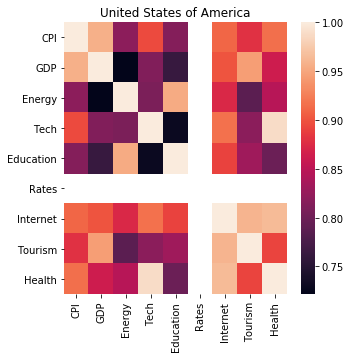

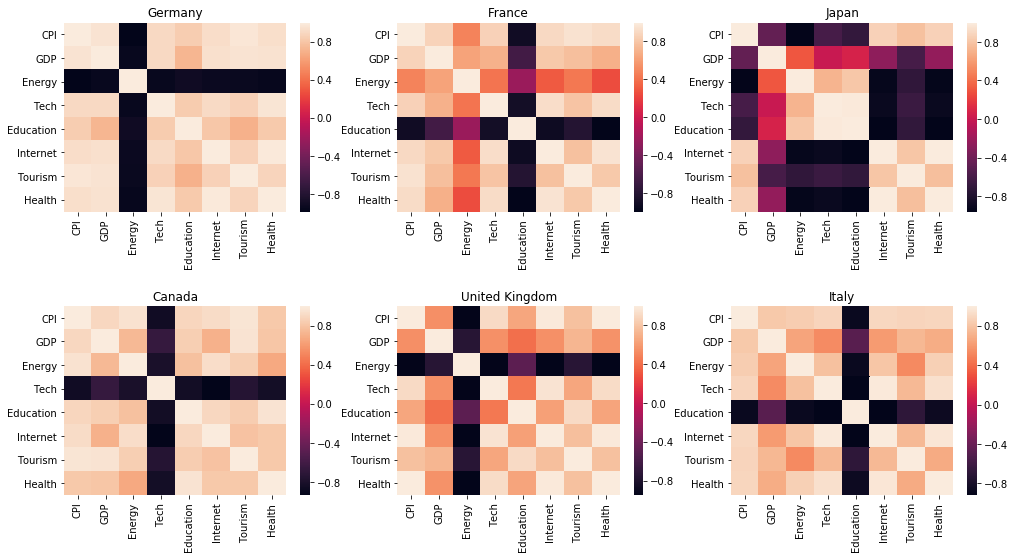

In [22]:
# first country:
plt.figure(figsize = (5, 5))
corr = df1[G7[0]].corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title(G7[0])
plt.show()

# all other 6 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1.2, hspace = 0.5)
for i in range(1, 7):
    plt.subplot(3,3,i)
    corr = df1[G7[i]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(G7[i])

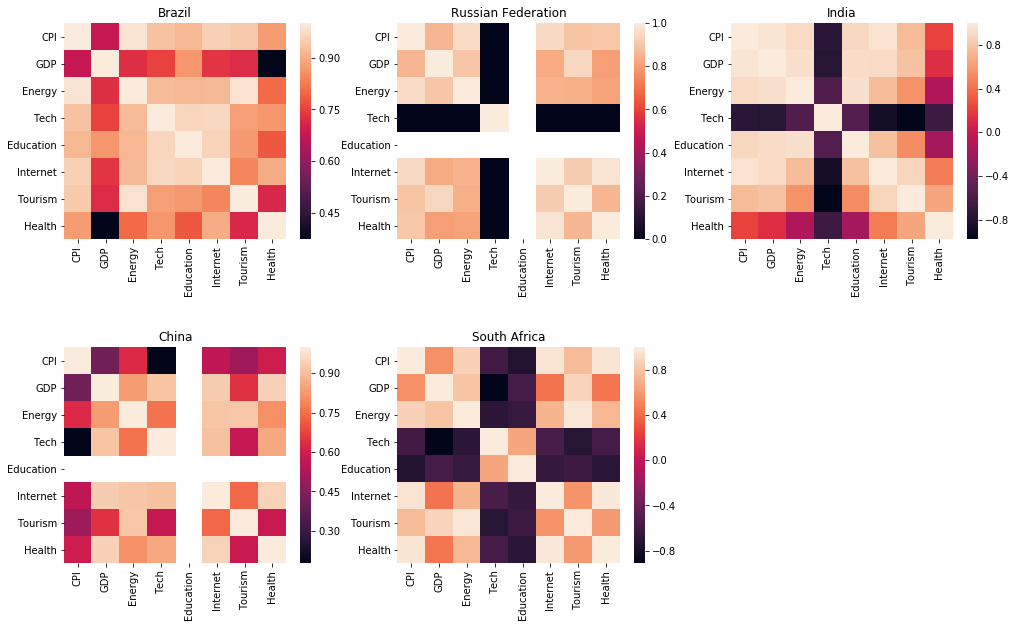

In [23]:
# first country in BRICS:
# plt.figure(figsize = (5, 5))
# corr = df2[BRICS[0]].corr()
# sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
# plt.title(BRICS[0])
# plt.show()

# all 5 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1, hspace = 0.5)
for i in range(1, 6):
    plt.subplot(2,3,i)
    corr = df2[BRICS[i-1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(BRICS[i-1])

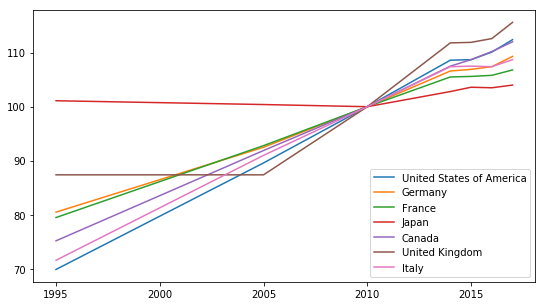

In [24]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].CPI, label = G7[i])
    plt.legend()

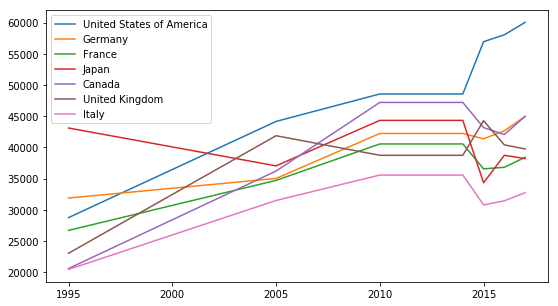

In [25]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].GDP, label = G7[i])
    plt.legend()

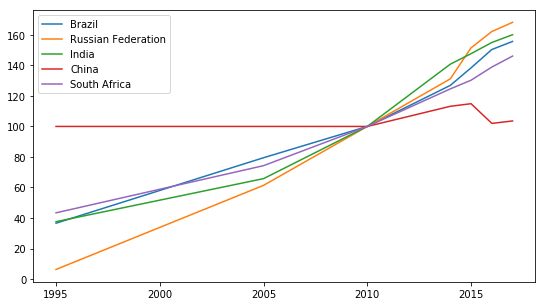

In [26]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()

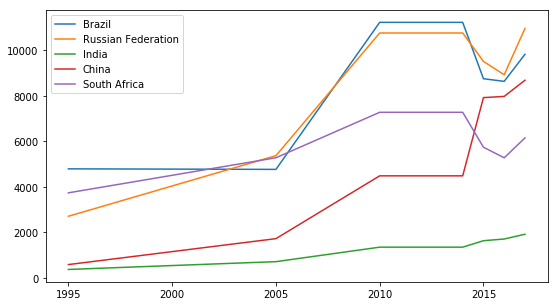

In [27]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].GDP, label = BRICS[i])
    plt.legend()

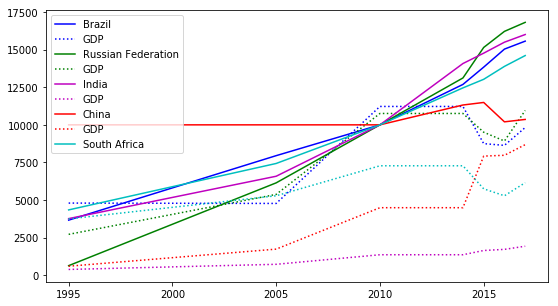

In [28]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI * 100, label = BRICS[i], color = colors[i], linestyle = "-")
    plt.legend()
    plt.plot(df2.index, df2[BRICS[i]].GDP, color = colors[i], linestyle = ":")


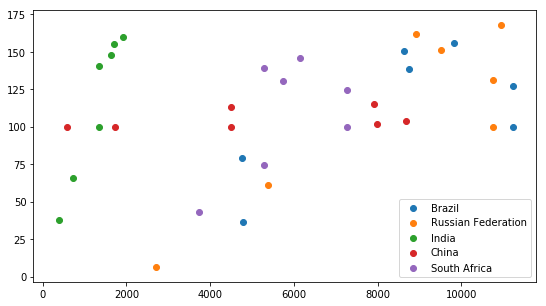

In [31]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.scatter(df2[BRICS[i]].GDP, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()


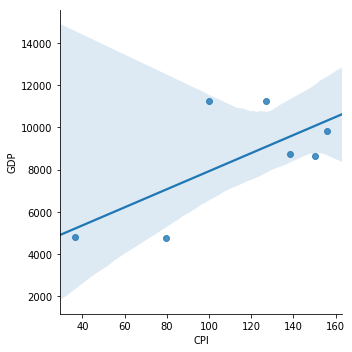

In [54]:
sns.lmplot("CPI", "GDP", data = df2[BRICS[0]])

<Figure size 648x360 with 0 Axes>

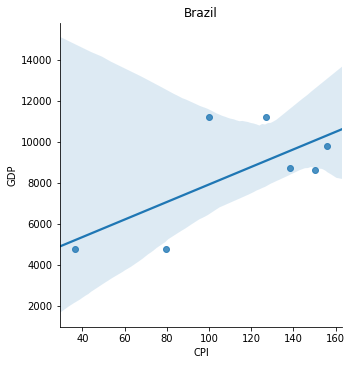

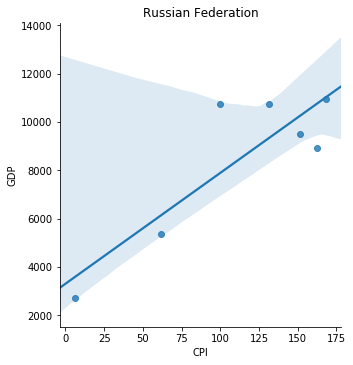

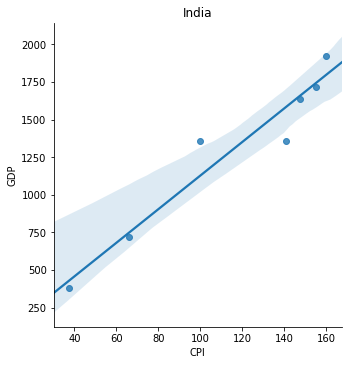

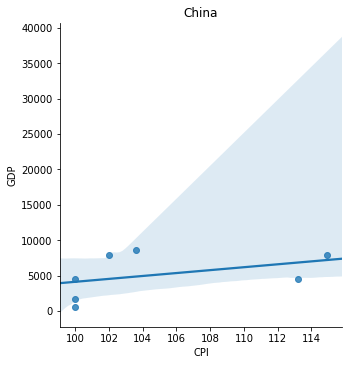

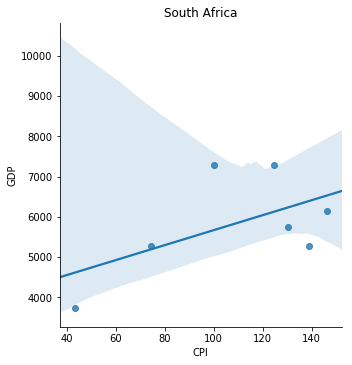

In [62]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    # plt.subplot(2,3,i+1)
    sns.lmplot("CPI", "GDP", data = df2[BRICS[i]])
    plt.title(BRICS[i])
